<a href="https://colab.research.google.com/github/panharithyi/MSIT-ML/blob/main/ML_lecture_14%2615_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Networks (ANNs)

In [ ]:
# Import keras lib

from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
# plot last frame in 3 diff scales
import matplotlib.pyplot as plt 

num_in_row = 2
num_in_col = 4
frame_idx = 3 # display frame index

plt.rcParams['figure.figsize'] = (10.0, 7.0) # set figure size

for i in range(num_in_row * num_in_col):
    x = x_train[i]
    plt.subplot(num_in_row, num_in_col, i+1)
    plt.imshow(x.astype('uint8'))
    
    plt.title('%s, Label:%d'% (x.shape, y_train[i]))
    plt.axis('off')
    
plt.show()

In [ ]:
# Reshape 2D image (28x28) into 1D image (784)
x_train_1d = x_train.reshape((x_train.shape[0], -1))
x_test_1d = x_test.reshape((x_test.shape[0], -1))

# number of classes (0,1,2,3,4,5,6,7,8,9)
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
print(x_train_1d.shape, y_train.shape)
print(x_test_1d.shape, y_test.shape)

## Model 1

In [ ]:
# Create model structure

# 92% on test data
model = keras.Sequential( #grouping below layers
    [
        keras.Input(shape=(784,)), #784 represents 784 input pixels = 28x28
        layers.Dense(15, activation="relu"), # 15 neurons
        layers.Dense(15, activation="relu"), # 15 neurons
        layers.Dense(num_classes, activation="softmax") # 10 classes (0, 1,2, ..., 9)
    ]
)

In [ ]:
# summary, plot model's structure
model.summary()

## Model 2

In [ ]:
# Create model structure (initiate model)

# 94%
model = keras.Sequential( #grouping below layers
    [
        keras.Input(shape=(784,)), #784 represents 784 input pixels = 28x28
        layers.Dense(32, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(num_classes, activation="softmax") # 10 classes (0, 1,2, ..., 9)
    ]
)

## Model 3

In [ ]:
# Create model structure (initiate model)

# 96%
model = keras.Sequential( #grouping below layers
    [
        keras.Input(shape=(784,)), #784 represents 784 input pixels = 28x28
        layers.Dense(32, activation="relu"), 
        layers.Dense(64, activation="relu"), 
        layers.Dense(128, activation="relu"), # add another layer
        layers.Dense(num_classes, activation="softmax") # 10 classes (0, 1,2, ..., 9)
    ]
)

## Model 4

In [ ]:
# Create model structure (initiate model)

# ?

In [ ]:
# it's time to train our model/algorithm

# Compile our model, link: https://keras.io/api/models/model_training_apis/
## Since, it's a multi-class (10 classes), we use "categorical_crossentropy"


opt = keras.optimizers.Adam(learning_rate=0.001) #default: 0.001

model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train our model
history = model.fit(x_train_1d, y_train, batch_size=64, epochs=20, validation_split=0.2, verbose=1) # 80% of 60000 for training, 20% of 60000 for validation


# Model.fit(
#     x=None, > training data
#     y=None, > training label
#     batch_size=None, > batch
#     epochs=1, > loop
#     verbose="auto", > log, 0, 1, 2
#     callbacks=None,
#     validation_split=0.0, > split training into training/validation set
#)

Epoch 1/20
750/750 [==============================] - 3s 4ms/step - loss: 0.6159 - accuracy: 0.8286 - val_loss: 0.5817 - val_accuracy: 0.8410
Epoch 2/20
750/750 [==============================] - 3s 3ms/step - loss: 0.5878 - accuracy: 0.8375 - val_loss: 0.5588 - val_accuracy: 0.8494
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5680 - accuracy: 0.8438 - val_loss: 0.5422 - val_accuracy: 0.8538
Epoch 4/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5568 - accuracy: 0.8474 - val_loss: 0.5237 - val_accuracy: 0.8582
Epoch 5/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5478 - accuracy: 0.8493 - val_loss: 0.5151 - val_accuracy: 0.8616
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.5410 - accuracy: 0.8523 - val_loss: 0.5109 - val_accuracy: 0.8614
Epoch 7/20
750/750 [==============================] - 2s 3ms/step - loss: 0.5298 - accuracy: 0.8580 - val_loss: 0.5128 - val_accuracy: 0.8647
Epoch 

In [ ]:
#y_pred = model.predict(x_test_1d, verbose=1)

In [ ]:
score = model.evaluate(x_test_1d, y_test, verbose=0)
print("Test loss on test data:", score[0])
print("Test accuracy on test data:", score[1])


Test loss on test data: 0.6163585186004639
Test accuracy on test data: 0.832099974155426


## Save and load our model/algorithm

In [ ]:
# Save our model/algorithm after training
model.save("my_model_96%.h5")

In [ ]:
from keras.models import load_model
my_model = load_model("my_model.h5")

score = my_model.evaluate(x_test_1d, y_test, verbose=0)
print("Test accuracy:", score[1])

## Plot our accuracy/loss

In [ ]:
history.history

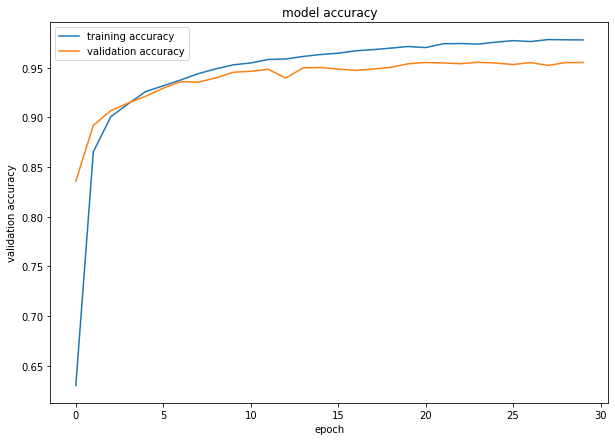

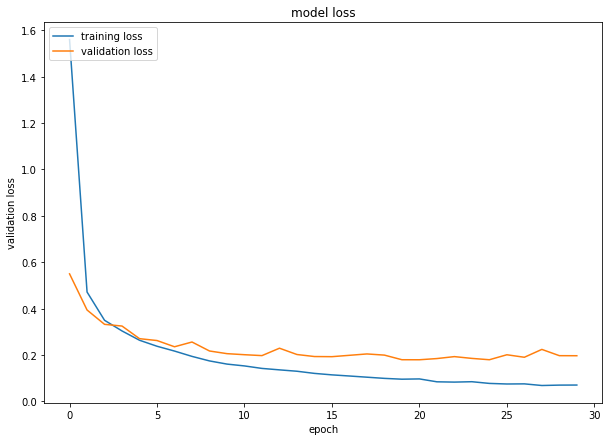

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracies
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['training accuracy', 'validation accuracy'], loc='upper left')
plt.show()

# Plot losses
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('validation loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper left')
plt.show()